In [29]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
from sklearn.model_selection import train_test_split
import random
from sklearn.utils import shuffle
from imgaug import augmenters as iaa

In [2]:
cucumber_images = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\CUCUMBER\cucumber_images.npy")
cucumber_labels = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\CUCUMBER\cucumber_labels.npy")
cucumber_labels_mapping = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\CUCUMBER\cucumber_label_mapping.npy")

grape_images = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\GRAPE\GRAPE_images.npy")
grape_labels = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\GRAPE\GRAPE_labels.npy")
grape_labels_mapping = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\GRAPE\GRAPE_label_mapping.npy")

potato_images = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\POTATO\POTATO_images.npy")
potato_labels = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\POTATO\POTATO_labels.npy")
potato_labels_mapping = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\POTATO\POTATO_label_mapping.npy")

sugarcane_images = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\SUGARCANE\SUGARCANE_images.npy")
sugarcane_labels = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\SUGARCANE\SUGARCANE_labels.npy")
sugarcane_labels_mapping = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\SUGARCANE\SUGARCANE_label_mapping.npy")

In [3]:
print(cucumber_images.shape, grape_images.shape, potato_images.shape, sugarcane_images.shape)

(1329, 224, 224, 3) (878, 224, 224, 3) (684, 224, 224, 3) (2521, 224, 224, 3)


In [4]:
x_data = np.concatenate([cucumber_images, grape_images, potato_images, sugarcane_images], axis= 0)

In [5]:
print(x_data.shape)

(5412, 224, 224, 3)


In [6]:
labels_data = []
for i in range(0, len(cucumber_labels)):
    labels_data.append(cucumber_labels_mapping[cucumber_labels[i]])

In [7]:
for i in range(0, len(grape_labels)):
    labels_data.append(grape_labels_mapping[grape_labels[i]])
for i in range(0, len(potato_labels)):
    labels_data.append(potato_labels_mapping[potato_labels[i]])
for i in range(0, len(sugarcane_labels)):
    labels_data.append(sugarcane_labels_mapping[sugarcane_labels[i]])

In [8]:
# Create a new empty list
res = []

# Add each val to the new list if it doesn't already exist
for val in labels_data:
    if val not in res:
        res.append(val)

print(res)

['Angular leaf spot', 'Anthracnose', 'Bacterial Wilt', 'Belly Rot', 'Cucumber mosaic', 'Downy Mildew', 'Fresh Cucumber', 'Fresh Leaf', 'Gummy Stem Blight', 'powder mildew', 'Pythium Fruit Rot', 'root knot', 'Grape Black Measles', 'Potato___Early_blight', 'Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']


In [9]:
print(len(labels_data))

5412


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels_data, random_state= 42, test_size= 0.2)

In [19]:
print(x_train.shape, len(y_train))
print(x_test.shape, len(y_test))

(4329, 224, 224, 3) 4329
(1083, 224, 224, 3) 1083


In [20]:
labels_dict = {}
for i,l in enumerate(labels_data):
    key = l.astype(str)
    key = ''.join(key).zfill(6)
    labels_dict[key] = i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


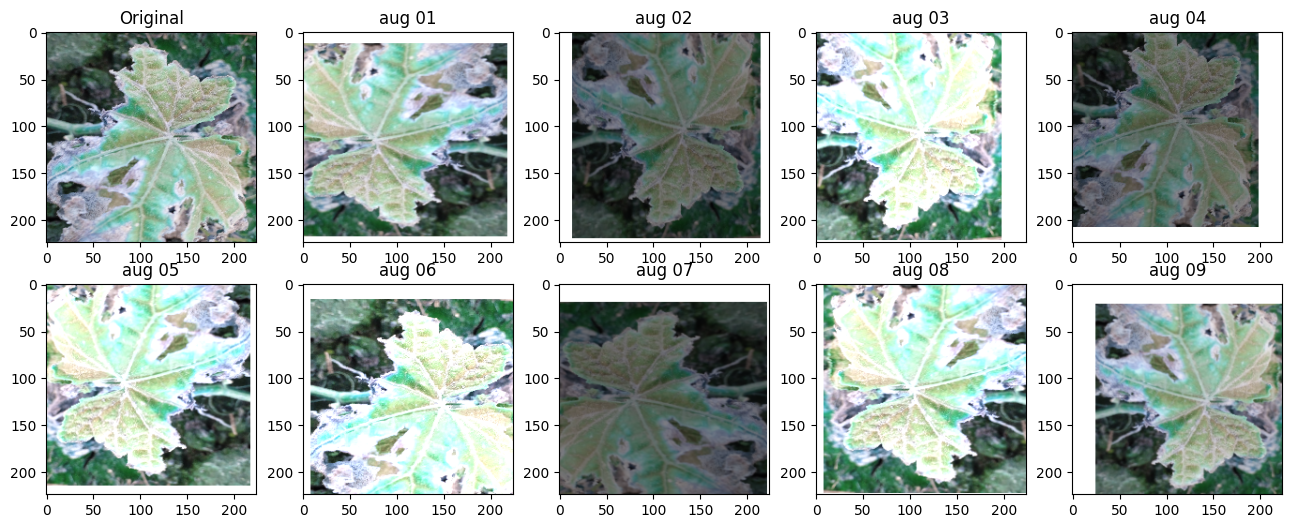

In [28]:
augs = [x_data[98]]*9

seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0,0.5)),
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        #use nearest neighbour or  bilinear interpolation (fast)
        order=[0,1],
        #if mode is constant, use a cval between 0 and 255
        cval=255
    ),
    #iaa.Add((-10,10)),
    iaa.Multiply((0.5, 1.5)),
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5)
], random_order= True)

augs = seq.augment_images(augs)

plt.figure(figsize=(16,6))
plt.subplot(2,5,1)
plt.title('Original')
plt.imshow(x_data[98].squeeze(), cmap='gray')
for i, aug in enumerate(augs):
    plt.subplot(2,5,i+2)
    plt.title('aug %02d' % int(i+1))
    plt.imshow(aug.squeeze(), cmap='gray')

In [34]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self,x, labels_data, x_data, labels_dict, shuffle=True, batch_size = 32):
        self.x = x
        self.label = labels_data
        self.labels_dict = labels_dict
        self.x_data = x_data,
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()
    
    def __len__(self):
        return int(np.floor(len(self.x)/self.batch_size))
        
    def __getitem__(self, index):
        "Generates one batch of data"
        # Generate indexes of the batch
        x1_batch = self.x[index*self.batch_size:(index+1)*self.batch_size]
        label_batch = self.label[index*self.batch_size:(index+1)*self.batch_size]
        
        x2_batch = np.empty((self.batch_size, 224, 224), dtype = np.float32)
        y_batch = np.empty((self.batch_size), dtype = np.float32)
        
        #augmentation
        if self.shuffle:
            seq = iaa.Sequential([
                iaa.GaussianBlur(sigma=(0, 0.5)),
                iaa.Affine(
                    scale={"x": (0.8, 1.2), "y": (0.9, 1.1)},
                    translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
                    rotate=(-45, 45),
                    order = [0,1],
                    cval = 255
                ),
                iaa.Add((-10, 10)),
                    iaa.Multiply((0.5, 1.5)),
                    iaa.Fliplr(0.5),
                    iaa.Flipud(0.5)
            ], random_order= True)
            
            x1_batch = seq.augment_images(x1_batch)
            
    # pick matched images(label 1.0) and unmatched images(label 0.0) and put together in batch
    # matched images must be all same, [subject_id(3), gender(1), left_right(1), finger(1)], e.g) 034010
        for i, l in enumerate(label_batch):
            match_key = l.astype(str)
            match_key = ''.join(match_key).zfill(6)
            
            if random.random() > 0.5:
                # put matched image
                x2_batch[i] = self.x_real[self.Label_real_dict[match_key]]
                y_batch[i] = 1.
                
            else:
                # put unmatched image
                while True:
                    unmatch_key, unmatch_index = random.choice(list(self.Label_real_dict.items()))
                    
                    if unmatch_key != match_key:
                        break
                
                x2_batch[i] = self.x_real[unmatch_index]
                y_batch[i] = 0.
    
        return [x1_batch.astype(np.float32)/255., x2_batch.astype(np.float32)/255.], y_batch
    
    def on_epoch_end(self):
        if self.shuffle == True:
            self.x, self.label = shuffle(self.x, self.label)

In [35]:
train_gen = DataGenerator(x_train, y_train, x_data, labels_dict, shuffle = True)
val_gen = DataGenerator(x_test, y_test, x_data, labels_dict, shuffle= False)